*TD 1 - M2MO - 2023/2024*

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import torch

# Necessary baby-steps before writing a neural network

The `torch.nn.Module` class is a fundamental building block in PyTorch that serves as a base class for all neural network modules. It provides a convenient way to organize and encapsulate all the learnable parameters (i.e., weights and biases) and operations of a neural network in one place.

The main purpose of the `torch.nn.Module` class is to define the architecture of a neural network and specify how input data should flow through the network to produce an output. It provides methods for defining the parameters of the network, initializing the parameters, and performing forward and backward passes through the network.

Additionally, the `torch.nn.Module` class provides several helpful methods for managing the state of the network, such as `.train()` and `.eval()` for setting the network to training or evaluation mode (essential for `BatchNorm` for example), and `.parameters()` for accessing the learnable parameters of the network.

By subclassing this class and implementing the `forward()` method, you can define complex neural network architectures and use them for a wide range of machine learning tasks.

Write a subclass of `torch.nn.Module` to represent a simple linear model that predicts a real-valued output variable $y = w^{\top}x$ given a vector-valued input variable $x$, where $w$ is the vector of weights of the linear model. The dimension `dim` of $x$, which will also be the number of weights in $w$, is expected to be passed as a parameter to the constructor of your subclass.

Implement the `forward` method of your model to define how the input data should flow through the model to produce an output. Implement it while assuming that the input `x` is a row vector.

In [2]:
class LinearRegression(torch.nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.w = torch.nn.Parameter(torch.randn(dim, dtype = torch.float32, device='cuda'))
    
    def forward(self, x):
        y = x @ self.w
        return y

Test your model on some example input data to verify that it produces the expected output.

In [3]:
model = LinearRegression(5)

In [4]:
x = torch.tensor([2., 4., 8., 16., 32.], dtype=torch.float32, device='cuda')
model.w.data.copy_(torch.tensor([1., 2., 3., 4., 5.], dtype=torch.float32))

tensor([1., 2., 3., 4., 5.], device='cuda:0')

In [5]:
model(x)

tensor(258., device='cuda:0', grad_fn=<DotBackward0>)

In [6]:
sum(xx * ww for xx, ww in zip(x, model.w.data)) # dirty check using plain iteration and the standard library's sum function

tensor(258., device='cuda:0')

Using the `LinearRegression` model that you implemented, create some dummy data consisting of 2000 samples, where each sample has an input of dimension 5 and an output of dimension 1.

Split your data evenly into a training set and a validation set.

Define a mean squared error (MSE) loss function and a stochastic gradient descent (SGD) optimizer with a learning rate of 0.01.

Train the model on the training set for 3000 epochs, and after each epoch, evaluate the model on the validation set and print the loss. Plot the training loss and validation loss over time to visualize the training progress.

In [7]:
# Create "reference" weights which we will forget about once we generate linear data
w = torch.tensor([1., 2., 4., 6.], dtype=torch.float32, device='cuda')

# Generate some dummy data
x = torch.randn((2000, 4), dtype=torch.float32, device='cuda')
y = x @ w

# Split the data evenly into training and validation sets
x_train, x_val = x.split(x.size(0) // 2)
y_train, y_val = y.split(y.size(0) // 2)

In [8]:
# Define the model, loss function, and optimizer
model = LinearRegression(4)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  

In [9]:
num_iters = 3000
train_losses = []
val_losses = []

y_train_var = y_train.var() # ... (we want the variance of the response here, will be used later for normalization purposes)

for epoch in range(num_iters):
    y_pred_train = model(x_train)
    train_loss = loss(y_pred_train, y_train) / y_train_var

    # Compute the gradients and update the parameters
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    # Perform the forward pass on the validation set
    y_pred_val = model(x_val)
    val_loss = loss(y_pred_val, y_val) / y_train_var # ... (same remark as for train_loss)

    # Print the loss after each epoch
    print(f"Epoch {epoch+1}: Train Loss = {train_loss.item():.4f}, Val Loss = {val_loss.item():.4f}")
    
    # Record the training and validation losses for plotting
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

Epoch 1: Train Loss = 1.5016, Val Loss = 1.6294
Epoch 2: Train Loss = 1.5005, Val Loss = 1.6283
Epoch 3: Train Loss = 1.4995, Val Loss = 1.6271
Epoch 4: Train Loss = 1.4984, Val Loss = 1.6260
Epoch 5: Train Loss = 1.4974, Val Loss = 1.6249
Epoch 6: Train Loss = 1.4963, Val Loss = 1.6237
Epoch 7: Train Loss = 1.4953, Val Loss = 1.6226
Epoch 8: Train Loss = 1.4943, Val Loss = 1.6215
Epoch 9: Train Loss = 1.4932, Val Loss = 1.6203
Epoch 10: Train Loss = 1.4922, Val Loss = 1.6192
Epoch 11: Train Loss = 1.4911, Val Loss = 1.6181
Epoch 12: Train Loss = 1.4901, Val Loss = 1.6169
Epoch 13: Train Loss = 1.4890, Val Loss = 1.6158
Epoch 14: Train Loss = 1.4880, Val Loss = 1.6147
Epoch 15: Train Loss = 1.4870, Val Loss = 1.6136
Epoch 16: Train Loss = 1.4859, Val Loss = 1.6124
Epoch 17: Train Loss = 1.4849, Val Loss = 1.6113
Epoch 18: Train Loss = 1.4838, Val Loss = 1.6102
Epoch 19: Train Loss = 1.4828, Val Loss = 1.6091
Epoch 20: Train Loss = 1.4818, Val Loss = 1.6079
Epoch 21: Train Loss = 1.4807

Epoch 892: Train Loss = 0.6519, Val Loss = 0.6581
Epoch 893: Train Loss = 0.6514, Val Loss = 0.6577
Epoch 894: Train Loss = 0.6509, Val Loss = 0.6572
Epoch 895: Train Loss = 0.6504, Val Loss = 0.6567
Epoch 896: Train Loss = 0.6500, Val Loss = 0.6562
Epoch 897: Train Loss = 0.6495, Val Loss = 0.6558
Epoch 898: Train Loss = 0.6490, Val Loss = 0.6553
Epoch 899: Train Loss = 0.6485, Val Loss = 0.6548
Epoch 900: Train Loss = 0.6481, Val Loss = 0.6543
Epoch 901: Train Loss = 0.6476, Val Loss = 0.6539
Epoch 902: Train Loss = 0.6471, Val Loss = 0.6534
Epoch 903: Train Loss = 0.6466, Val Loss = 0.6529
Epoch 904: Train Loss = 0.6462, Val Loss = 0.6524
Epoch 905: Train Loss = 0.6457, Val Loss = 0.6520
Epoch 906: Train Loss = 0.6452, Val Loss = 0.6515
Epoch 907: Train Loss = 0.6447, Val Loss = 0.6510
Epoch 908: Train Loss = 0.6443, Val Loss = 0.6505
Epoch 909: Train Loss = 0.6438, Val Loss = 0.6501
Epoch 910: Train Loss = 0.6433, Val Loss = 0.6496
Epoch 911: Train Loss = 0.6428, Val Loss = 0.6491


Epoch 1226: Train Loss = 0.5104, Val Loss = 0.5165
Epoch 1227: Train Loss = 0.5100, Val Loss = 0.5161
Epoch 1228: Train Loss = 0.5096, Val Loss = 0.5158
Epoch 1229: Train Loss = 0.5093, Val Loss = 0.5154
Epoch 1230: Train Loss = 0.5089, Val Loss = 0.5150
Epoch 1231: Train Loss = 0.5085, Val Loss = 0.5147
Epoch 1232: Train Loss = 0.5081, Val Loss = 0.5143
Epoch 1233: Train Loss = 0.5078, Val Loss = 0.5139
Epoch 1234: Train Loss = 0.5074, Val Loss = 0.5135
Epoch 1235: Train Loss = 0.5070, Val Loss = 0.5132
Epoch 1236: Train Loss = 0.5067, Val Loss = 0.5128
Epoch 1237: Train Loss = 0.5063, Val Loss = 0.5124
Epoch 1238: Train Loss = 0.5059, Val Loss = 0.5120
Epoch 1239: Train Loss = 0.5056, Val Loss = 0.5117
Epoch 1240: Train Loss = 0.5052, Val Loss = 0.5113
Epoch 1241: Train Loss = 0.5048, Val Loss = 0.5109
Epoch 1242: Train Loss = 0.5044, Val Loss = 0.5106
Epoch 1243: Train Loss = 0.5041, Val Loss = 0.5102
Epoch 1244: Train Loss = 0.5037, Val Loss = 0.5098
Epoch 1245: Train Loss = 0.5033

Epoch 1535: Train Loss = 0.4071, Val Loss = 0.4129
Epoch 1536: Train Loss = 0.4068, Val Loss = 0.4126
Epoch 1537: Train Loss = 0.4065, Val Loss = 0.4123
Epoch 1538: Train Loss = 0.4062, Val Loss = 0.4120
Epoch 1539: Train Loss = 0.4059, Val Loss = 0.4117
Epoch 1540: Train Loss = 0.4056, Val Loss = 0.4114
Epoch 1541: Train Loss = 0.4053, Val Loss = 0.4111
Epoch 1542: Train Loss = 0.4051, Val Loss = 0.4108
Epoch 1543: Train Loss = 0.4048, Val Loss = 0.4105
Epoch 1544: Train Loss = 0.4045, Val Loss = 0.4102
Epoch 1545: Train Loss = 0.4042, Val Loss = 0.4099
Epoch 1546: Train Loss = 0.4039, Val Loss = 0.4096
Epoch 1547: Train Loss = 0.4036, Val Loss = 0.4093
Epoch 1548: Train Loss = 0.4033, Val Loss = 0.4091
Epoch 1549: Train Loss = 0.4030, Val Loss = 0.4088
Epoch 1550: Train Loss = 0.4027, Val Loss = 0.4085
Epoch 1551: Train Loss = 0.4024, Val Loss = 0.4082
Epoch 1552: Train Loss = 0.4021, Val Loss = 0.4079
Epoch 1553: Train Loss = 0.4018, Val Loss = 0.4076
Epoch 1554: Train Loss = 0.4015

Epoch 1824: Train Loss = 0.3296, Val Loss = 0.3350
Epoch 1825: Train Loss = 0.3294, Val Loss = 0.3348
Epoch 1826: Train Loss = 0.3292, Val Loss = 0.3345
Epoch 1827: Train Loss = 0.3289, Val Loss = 0.3343
Epoch 1828: Train Loss = 0.3287, Val Loss = 0.3340
Epoch 1829: Train Loss = 0.3284, Val Loss = 0.3338
Epoch 1830: Train Loss = 0.3282, Val Loss = 0.3335
Epoch 1831: Train Loss = 0.3280, Val Loss = 0.3333
Epoch 1832: Train Loss = 0.3277, Val Loss = 0.3331
Epoch 1833: Train Loss = 0.3275, Val Loss = 0.3328
Epoch 1834: Train Loss = 0.3272, Val Loss = 0.3326
Epoch 1835: Train Loss = 0.3270, Val Loss = 0.3323
Epoch 1836: Train Loss = 0.3268, Val Loss = 0.3321
Epoch 1837: Train Loss = 0.3265, Val Loss = 0.3319
Epoch 1838: Train Loss = 0.3263, Val Loss = 0.3316
Epoch 1839: Train Loss = 0.3261, Val Loss = 0.3314
Epoch 1840: Train Loss = 0.3258, Val Loss = 0.3311
Epoch 1841: Train Loss = 0.3256, Val Loss = 0.3309
Epoch 1842: Train Loss = 0.3253, Val Loss = 0.3307
Epoch 1843: Train Loss = 0.3251

Epoch 2107: Train Loss = 0.2681, Val Loss = 0.2730
Epoch 2108: Train Loss = 0.2679, Val Loss = 0.2728
Epoch 2109: Train Loss = 0.2677, Val Loss = 0.2726
Epoch 2110: Train Loss = 0.2676, Val Loss = 0.2724
Epoch 2111: Train Loss = 0.2674, Val Loss = 0.2722
Epoch 2112: Train Loss = 0.2672, Val Loss = 0.2720
Epoch 2113: Train Loss = 0.2670, Val Loss = 0.2718
Epoch 2114: Train Loss = 0.2668, Val Loss = 0.2717
Epoch 2115: Train Loss = 0.2666, Val Loss = 0.2715
Epoch 2116: Train Loss = 0.2664, Val Loss = 0.2713
Epoch 2117: Train Loss = 0.2662, Val Loss = 0.2711
Epoch 2118: Train Loss = 0.2660, Val Loss = 0.2709
Epoch 2119: Train Loss = 0.2658, Val Loss = 0.2707
Epoch 2120: Train Loss = 0.2656, Val Loss = 0.2705
Epoch 2121: Train Loss = 0.2654, Val Loss = 0.2703
Epoch 2122: Train Loss = 0.2652, Val Loss = 0.2701
Epoch 2123: Train Loss = 0.2650, Val Loss = 0.2699
Epoch 2124: Train Loss = 0.2648, Val Loss = 0.2697
Epoch 2125: Train Loss = 0.2646, Val Loss = 0.2695
Epoch 2126: Train Loss = 0.2645

Epoch 2418: Train Loss = 0.2138, Val Loss = 0.2181
Epoch 2419: Train Loss = 0.2136, Val Loss = 0.2180
Epoch 2420: Train Loss = 0.2135, Val Loss = 0.2178
Epoch 2421: Train Loss = 0.2133, Val Loss = 0.2177
Epoch 2422: Train Loss = 0.2131, Val Loss = 0.2175
Epoch 2423: Train Loss = 0.2130, Val Loss = 0.2173
Epoch 2424: Train Loss = 0.2128, Val Loss = 0.2172
Epoch 2425: Train Loss = 0.2127, Val Loss = 0.2170
Epoch 2426: Train Loss = 0.2125, Val Loss = 0.2169
Epoch 2427: Train Loss = 0.2124, Val Loss = 0.2167
Epoch 2428: Train Loss = 0.2122, Val Loss = 0.2166
Epoch 2429: Train Loss = 0.2121, Val Loss = 0.2164
Epoch 2430: Train Loss = 0.2119, Val Loss = 0.2162
Epoch 2431: Train Loss = 0.2117, Val Loss = 0.2161
Epoch 2432: Train Loss = 0.2116, Val Loss = 0.2159
Epoch 2433: Train Loss = 0.2114, Val Loss = 0.2158
Epoch 2434: Train Loss = 0.2113, Val Loss = 0.2156
Epoch 2435: Train Loss = 0.2111, Val Loss = 0.2155
Epoch 2436: Train Loss = 0.2110, Val Loss = 0.2153
Epoch 2437: Train Loss = 0.2108

Epoch 2728: Train Loss = 0.1706, Val Loss = 0.1744
Epoch 2729: Train Loss = 0.1705, Val Loss = 0.1743
Epoch 2730: Train Loss = 0.1703, Val Loss = 0.1742
Epoch 2731: Train Loss = 0.1702, Val Loss = 0.1741
Epoch 2732: Train Loss = 0.1701, Val Loss = 0.1739
Epoch 2733: Train Loss = 0.1700, Val Loss = 0.1738
Epoch 2734: Train Loss = 0.1698, Val Loss = 0.1737
Epoch 2735: Train Loss = 0.1697, Val Loss = 0.1736
Epoch 2736: Train Loss = 0.1696, Val Loss = 0.1734
Epoch 2737: Train Loss = 0.1695, Val Loss = 0.1733
Epoch 2738: Train Loss = 0.1694, Val Loss = 0.1732
Epoch 2739: Train Loss = 0.1692, Val Loss = 0.1731
Epoch 2740: Train Loss = 0.1691, Val Loss = 0.1729
Epoch 2741: Train Loss = 0.1690, Val Loss = 0.1728
Epoch 2742: Train Loss = 0.1689, Val Loss = 0.1727
Epoch 2743: Train Loss = 0.1687, Val Loss = 0.1726
Epoch 2744: Train Loss = 0.1686, Val Loss = 0.1724
Epoch 2745: Train Loss = 0.1685, Val Loss = 0.1723
Epoch 2746: Train Loss = 0.1684, Val Loss = 0.1722
Epoch 2747: Train Loss = 0.1682

Epoch 2999: Train Loss = 0.1401, Val Loss = 0.1435
Epoch 3000: Train Loss = 0.1400, Val Loss = 0.1434


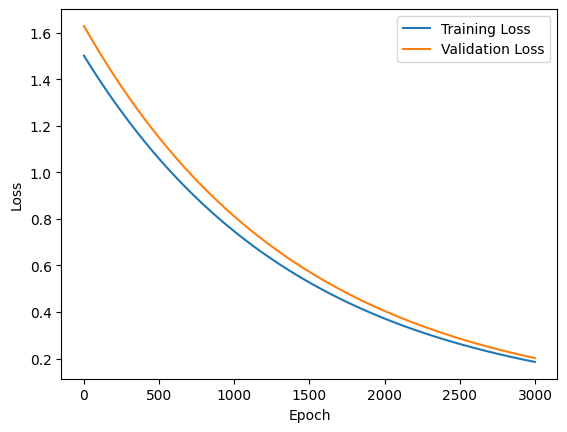

In [10]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

As a sanity check, now compare the *groundtruth* weights you used to generate the data, and the weights estimated by your training routine. Both should be roughly close.

In [11]:
w

tensor([1., 2., 4., 6.], device='cuda:0')

In [12]:
model.w

Parameter containing:
tensor([0.4419, 1.7993, 1.8685, 3.5952], device='cuda:0', requires_grad=True)

# Pricing using a neural network

Write a function `generate_S0_callpayoff(N, K, T, r, sigma)` which generates `N` samples from the pair $\left(S_0, e^{-r T}\left(S_T-K\right)^+\right)$. The function should return two `numpy` arrays of shape `(N,1)`, one for $S_0$ and the other for the call payoff, where the $i$-th row represents the $i$-th sample. Assume $S_0 \sim \mathcal{U}\left(\left[10,200\right]\right)$ and that conditional on $S_0$, $\left(S_t\right)_t$ has Black-Scholes dynamics with drift $r$ (`r`) and vol $\sigma$ (`sigma`).

In [13]:
import torch

def generate_S0_callpayoff(N, K, T, r, sigma):
    a = 20
    b = 200
    S0 = a + (b - a) * torch.rand(N, device='cuda')  # Génère S0 uniformément distribué entre a et b
    Z = torch.randn(N, device='cuda')  # Génère des réalisations de Z ~ N(0,1)
    T = torch.tensor(T, dtype=torch.float32, device='cuda')  # Assurez-vous que T est un tensor de type float
    # Calcule ST en utilisant uniquement des opérations PyTorch
    ST = torch.max(S0 * torch.exp((r - 0.5 * sigma**2) * T + sigma * torch.sqrt(T) * Z) - K, torch.tensor(0.)) * torch.exp(-r * T)
    return S0.unsqueeze(1), ST.unsqueeze(1)

Generate 100000 samples for training and 100000 samples for validation.
Take $K=102.5$, $T=1.5$, $r=2.5\%$ and $\sigma=30\%$.

In [14]:
K = 102.5
T = 1.5
r = 0.025
sigma = 0.3
N = 100000

S0_train, payoff_train = generate_S0_callpayoff(N, K, T, r, sigma)
S0_val, payoff_val = generate_S0_callpayoff(N, K, T, r, sigma)

Your task now is to implement a feedforward neural network with two hidden layers, each with 15 neurons and sigmoid activations. The input and output dimensions should both be equal to 1.

The neural network should output $y = W_{out} \varphi\left(W_2 \varphi\left(W_1 x + b_1\right) + b_2\right)+b_{out}$ for a given input $x$, where $\varphi : u \mapsto \frac{1}{1+e^{-u}}$ is the sigmoid activation function applied element-wise on vector inputs, $W_1$, $W_2$ and $W_{out}$ are respectively $15\times 1$, $15\times 15$ and $1\times 15$ weight matrices, and $b_1, b_2 \in \mathbb{R}^{15}$ and $b_{out} \in \mathbb{R}$ are biases. For better numerical stability, use `torch.sigmoid` instead of implementing the activation function yourself (otherwise you will have to deal with overflow issues because of the exponential).

$W_1$, $W_2$, $W_{out}$, $b_1$, $b_2$ and $b_{out}$ are the parameters of the neural network, to be estimated later during training.

Make sure that the initial values of the weight matrices are such that each weight of a given layer is normally distributed with mean $0$ and variance $\frac{2}{n_{in}+n_{out}}$ where $n_{in}$ and $n_{out}$ and the input and output dimensions of the layer.

The biases on the other hand can be initialized to zero.

In [15]:
from math import sqrt

class FeedforwardNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.wout = torch.nn.Parameter(sqrt(2/16) * torch.randn((15, 1), dtype = torch.float32))
        self.w1 = torch.nn.Parameter(sqrt(2/16) * torch.randn((1, 15), dtype = torch.float32))
        self.w2 = torch.nn.Parameter(sqrt(2/30) * torch.randn((15, 15), dtype = torch.float32))
        
        self.bout = torch.nn.Parameter(torch.zeros(1, dtype = torch.float32))
        self.b1 = torch.nn.Parameter(torch.zeros(1, 15, dtype = torch.float32))
        self.b2 = torch.nn.Parameter(torch.zeros(1, 15, dtype = torch.float32))
        
    def forward(self, x):
        y = torch.sigmoid(torch.sigmoid(x@self.w1 + self.b1) @ self.w2 + self.b2)@self.wout + self.bout
        return y

Define a mean squared error (MSE) loss function and an Adam optimizer with a learning rate of 0.01.

Train your neural network on your dataset, assuming the input/output pairs are $S_0$ and the discounted payoff, for 1000 epochs, and after each epoch, evaluate the neural network on the validation set and print the loss. Plot the training loss and validation loss over time to visualize the training progress.

In [16]:
model = FeedforwardNeuralNetwork().cuda()
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  

In [17]:
num_epochs = 2000
train_losses = []
val_losses = []

S0_train_mean = S0_train.mean()# ... (we want the mean of the inputs here)
S0_train_std = S0_train.std()# ... (we want the stdev of the inputs here)

payoff_train_var = payoff_train.var()# ... (we want the variance of the responses here)

for epoch in range(num_epochs):
    # Perform the forward pass on the training set
    pred = model((S0_train - S0_train_mean)/S0_train_std)# ...
    train_loss = loss(pred, payoff_train) / payoff_train_var
    
    # Compute the gradients and update the parameters
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    # Perform the forward pass on the validation set
    with torch.no_grad():
        pred = model((S0_val - S0_train_mean)/S0_train_std)
        val_loss = loss(pred, payoff_val) / payoff_train_var

    # Print the loss after each epoch
    print(f"Epoch {epoch+1}: Train Loss = {train_loss.item():.4f}, Val Loss = {val_loss.item():.4f}")
    
    # Record the training and validation losses for plotting
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

Epoch 1: Train Loss = 1.4044, Val Loss = 1.4134
Epoch 2: Train Loss = 1.4000, Val Loss = 1.4091
Epoch 3: Train Loss = 1.3957, Val Loss = 1.4049
Epoch 4: Train Loss = 1.3915, Val Loss = 1.4008
Epoch 5: Train Loss = 1.3875, Val Loss = 1.3968
Epoch 6: Train Loss = 1.3835, Val Loss = 1.3929
Epoch 7: Train Loss = 1.3796, Val Loss = 1.3891
Epoch 8: Train Loss = 1.3758, Val Loss = 1.3854
Epoch 9: Train Loss = 1.3721, Val Loss = 1.3819
Epoch 10: Train Loss = 1.3686, Val Loss = 1.3784
Epoch 11: Train Loss = 1.3651, Val Loss = 1.3750
Epoch 12: Train Loss = 1.3618, Val Loss = 1.3717
Epoch 13: Train Loss = 1.3585, Val Loss = 1.3686
Epoch 14: Train Loss = 1.3554, Val Loss = 1.3655
Epoch 15: Train Loss = 1.3523, Val Loss = 1.3625
Epoch 16: Train Loss = 1.3494, Val Loss = 1.3597
Epoch 17: Train Loss = 1.3465, Val Loss = 1.3569
Epoch 18: Train Loss = 1.3437, Val Loss = 1.3542
Epoch 19: Train Loss = 1.3411, Val Loss = 1.3516
Epoch 20: Train Loss = 1.3385, Val Loss = 1.3491
Epoch 21: Train Loss = 1.3360

Epoch 1192: Train Loss = 0.6344, Val Loss = 0.6271
Epoch 1193: Train Loss = 0.6343, Val Loss = 0.6270
Epoch 1194: Train Loss = 0.6343, Val Loss = 0.6270
Epoch 1195: Train Loss = 0.6343, Val Loss = 0.6270
Epoch 1196: Train Loss = 0.6343, Val Loss = 0.6270
Epoch 1197: Train Loss = 0.6342, Val Loss = 0.6269
Epoch 1198: Train Loss = 0.6342, Val Loss = 0.6269
Epoch 1199: Train Loss = 0.6342, Val Loss = 0.6269
Epoch 1200: Train Loss = 0.6342, Val Loss = 0.6269
Epoch 1201: Train Loss = 0.6341, Val Loss = 0.6268
Epoch 1202: Train Loss = 0.6341, Val Loss = 0.6268
Epoch 1203: Train Loss = 0.6341, Val Loss = 0.6268
Epoch 1204: Train Loss = 0.6341, Val Loss = 0.6267
Epoch 1205: Train Loss = 0.6340, Val Loss = 0.6267
Epoch 1206: Train Loss = 0.6340, Val Loss = 0.6267
Epoch 1207: Train Loss = 0.6340, Val Loss = 0.6267
Epoch 1208: Train Loss = 0.6339, Val Loss = 0.6266
Epoch 1209: Train Loss = 0.6339, Val Loss = 0.6266
Epoch 1210: Train Loss = 0.6339, Val Loss = 0.6266
Epoch 1211: Train Loss = 0.6339

Epoch 1425: Train Loss = 0.6299, Val Loss = 0.6228
Epoch 1426: Train Loss = 0.6299, Val Loss = 0.6228
Epoch 1427: Train Loss = 0.6299, Val Loss = 0.6228
Epoch 1428: Train Loss = 0.6299, Val Loss = 0.6228
Epoch 1429: Train Loss = 0.6299, Val Loss = 0.6227
Epoch 1430: Train Loss = 0.6299, Val Loss = 0.6227
Epoch 1431: Train Loss = 0.6299, Val Loss = 0.6227
Epoch 1432: Train Loss = 0.6299, Val Loss = 0.6227
Epoch 1433: Train Loss = 0.6298, Val Loss = 0.6227
Epoch 1434: Train Loss = 0.6298, Val Loss = 0.6227
Epoch 1435: Train Loss = 0.6298, Val Loss = 0.6227
Epoch 1436: Train Loss = 0.6298, Val Loss = 0.6227
Epoch 1437: Train Loss = 0.6298, Val Loss = 0.6227
Epoch 1438: Train Loss = 0.6298, Val Loss = 0.6226
Epoch 1439: Train Loss = 0.6298, Val Loss = 0.6226
Epoch 1440: Train Loss = 0.6298, Val Loss = 0.6226
Epoch 1441: Train Loss = 0.6298, Val Loss = 0.6226
Epoch 1442: Train Loss = 0.6297, Val Loss = 0.6226
Epoch 1443: Train Loss = 0.6297, Val Loss = 0.6226
Epoch 1444: Train Loss = 0.6297

Epoch 1591: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1592: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1593: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1594: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1595: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1596: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1597: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1598: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1599: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1600: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1601: Train Loss = 0.6283, Val Loss = 0.6212
Epoch 1602: Train Loss = 0.6282, Val Loss = 0.6211
Epoch 1603: Train Loss = 0.6282, Val Loss = 0.6211
Epoch 1604: Train Loss = 0.6282, Val Loss = 0.6211
Epoch 1605: Train Loss = 0.6282, Val Loss = 0.6211
Epoch 1606: Train Loss = 0.6282, Val Loss = 0.6211
Epoch 1607: Train Loss = 0.6282, Val Loss = 0.6211
Epoch 1608: Train Loss = 0.6282, Val Loss = 0.6211
Epoch 1609: Train Loss = 0.6282, Val Loss = 0.6211
Epoch 1610: Train Loss = 0.6282

Epoch 1758: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1759: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1760: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1761: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1762: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1763: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1764: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1765: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1766: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1767: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1768: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1769: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1770: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1771: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1772: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1773: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1774: Train Loss = 0.6273, Val Loss = 0.6202
Epoch 1775: Train Loss = 0.6272, Val Loss = 0.6202
Epoch 1776: Train Loss = 0.6272, Val Loss = 0.6202
Epoch 1777: Train Loss = 0.6272

Epoch 1932: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1933: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1934: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1935: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1936: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1937: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1938: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1939: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1940: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1941: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1942: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1943: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1944: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1945: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1946: Train Loss = 0.6267, Val Loss = 0.6196
Epoch 1947: Train Loss = 0.6266, Val Loss = 0.6196
Epoch 1948: Train Loss = 0.6266, Val Loss = 0.6196
Epoch 1949: Train Loss = 0.6266, Val Loss = 0.6196
Epoch 1950: Train Loss = 0.6266, Val Loss = 0.6196
Epoch 1951: Train Loss = 0.6266

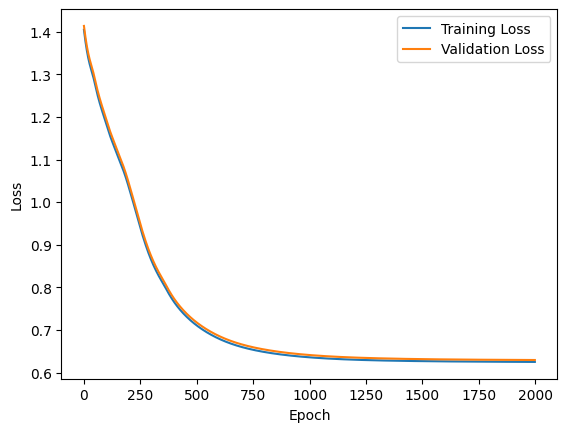

In [18]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

Make a scatter plot of the predictions of the network against $S_0$ on your test set. In the same plot, plot the price of the considered call as a function of $S_0$ and also the discounted payoffs against $S_0$. (for the discounted payoffs against $S_0$, perhaps limit yourself to the first $1000$ points of the test test otherwise the plot will be too crowded).

In [19]:
d1 = (torch.log(S0_val/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
price = S0_val.cpu().numpy()*stats.norm.cdf(d1.cpu().numpy())-np.exp(-r*T)*K*stats.norm.cdf(d2.cpu().numpy())

In [20]:
with torch.no_grad():
    pred = model((S0_val - S0_train_mean)/S0_train_std)

print(pred)

tensor([[11.1548],
        [ 8.7786],
        [38.9933],
        ...,
        [90.4785],
        [24.2488],
        [-0.1593]], device='cuda:0')


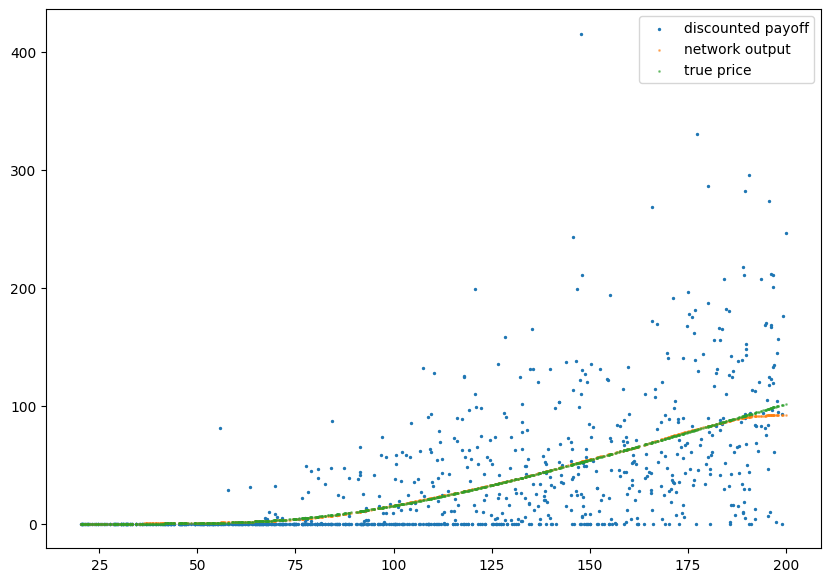

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(S0_val[:1000].cpu().numpy(), payoff_val[:1000].cpu().numpy(), s=2, alpha=1, label='discounted payoff')
plt.scatter(S0_val[:1000].cpu().numpy(), pred[:1000].cpu().numpy(), s=1, alpha=0.5, label='network output')
plt.scatter(S0_val[:1000].cpu().numpy(), price[:1000], s=1, alpha=0.5, label='true price')
plt.legend();

Propose an explanation for what is shown on the plots.

**Exercise:** Using the same approach, implement now a neural network to approximate the Black-Scholes price as a function of $S_0$, $r$, and $\sigma$ for fixed $K$ and $T$.

# Learning a CVA

We will consider a simplified setting where a bank has only one counterparty with which it has a forward contract with maturity $T$ and delivery price $K$. The bank is supposed to be long of the contract, and the underlying is assumed to follow the following Black-Scholes dynamics:
$$d\,S_t = r S_t d\,t + \sigma S_t d\,W_t$$

We then have the following simplified definition of the CVA in this setting:
$$\widehat{\mathrm{CVA}}_{t} := \mathbb{E}\left[e^{-r\left(\tau - t\right)} V_{\tau}^+ \mathbb{1}_{\left\{\tau \leq T\right\}}\left|\mathcal{F}_t, \left\{\tau > t\right\}\right.\right] \mathbb{1}_{\left\{\tau > t\right\}} \qquad \text{(I)}$$
where $V_t := \mathbb{E}\left[e^{-r\left(T - t\right)}\left(S_T - K\right)\left|\mathcal{F}_t\right.\right] = S_t - e^{-r\left(T - t\right)} K$ is the value of the forward contract at time $t$ from the point of view of the bank and $\tau$ is the default time of the counterparty.

We then have:

$$\widehat{\mathrm{CVA}}_{t} = \mathbb{E}\left[\int_t^T e^{-r\left(s - t\right)} \left(S_{s} - e^{-r\left(T - s\right)} K\right)^+ d \mathbb{P}\left[\tau \leq s \left| \tau > t\right.\right]\left|\mathcal{F}_t\right.\right] \mathbb{1}_{\left\{\tau > t\right\}}$$

If we consider the simple case where $\tau$ is driven by a deterministic constant default intensity $\gamma > 0$, ie $\tau \leq t \Leftrightarrow \epsilon \leq \gamma t$, then:

$$\widehat{\mathrm{CVA}}_{t} := \gamma \left( \int_t^T e^{-r\left(s - t\right)} \mathrm{C_{BS}}\left(t, S_t, e^{-r\left(T - s\right)} K, s\right) \left(1 - e^{-\gamma \left(s - t\right)}\right) d\,s \right) \mathbb{1}_{\left\{\tau > t\right\}} \qquad \text{(II)}$$

where $\mathrm{C_BS}\left(t, u, v, w\right)$ is the Black-Scholes price at time $t$ for a call option on the same underlying as our forward contract, assuming a spot price of the underlying of $u$, a strike $v$ and a maturity $w$.

Which could then be computed by numerical integration over a discrete time grid $0 = t_0 < t_1 < \dots < t_n = T$.

**(1)**: After writing the necessary simulation code for the underlying and the default time, approximate the CVA at the discrete time grid by learning directly the conditional expectation in $\text{(I)}$. You can safely assume that in that expectation, conditioning by $\mathcal{F}_t$ is the same as conditioning by $S_t$. You might prefer to work directly in discretized time to get an easier to learn expression for $\text{(I)}$ without exploiting what we know about the distribution of $\tau$.

**(2)**: Check your results against the expression in $\text{(II)}$ which requires no conditional expectation learning.

In [31]:
import torch

def generate_values(N, K, t, T, r, sigma, gamma):
    # Assurez-vous que gamma est un scalaire pour torch.poisson
    tau = torch.poisson(gamma * torch.ones(N, device='cuda'))
    Z = torch.randn(N, device='cuda')
    T_tensor = torch.full((N,), T, dtype=torch.float32, device='cuda')  # Crée un tenseur plein de T

    a = 0
    b = 400
    S_t = a + (b - a) * torch.rand(N, device='cuda')

    S_tau = S_t * torch.exp((r - 0.5 * sigma**2) * (T_tensor - tau) + sigma * torch.sqrt((T_tensor - tau)) * Z)
    V_tau = S_tau - torch.exp(-r * (T_tensor - tau)) * K
    V_tau = torch.nan_to_num(V_tau, nan=0.0)
    in_CVA = torch.exp(-r * (tau - t)) * torch.maximum(V_tau, torch.tensor(0., device='cuda')) * (tau <= T_tensor).float()

    return S_t.unsqueeze(1), in_CVA.unsqueeze(1)

In [32]:
K = 102.5
T = 1.5
t = 0.7
r = 0.025
sigma = 0.3
N = 100000
gamma = 1

St_train, in_cva_train = generate_values(N, K, t, T, r, sigma, gamma)
St_val, in_cva_val = generate_values(N, K, t, T, r, sigma, gamma)

In [33]:
from math import sqrt

class FeedforwardNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.wout = torch.nn.Parameter(sqrt(2/16) * torch.randn((15, 1), dtype = torch.float32))
        self.w1 = torch.nn.Parameter(sqrt(2/16) * torch.randn((1, 15), dtype = torch.float32))
        self.w2 = torch.nn.Parameter(sqrt(2/30) * torch.randn((15, 15), dtype = torch.float32))
        
        self.bout = torch.nn.Parameter(torch.zeros(1, dtype = torch.float32))
        self.b1 = torch.nn.Parameter(torch.zeros(1, 15, dtype = torch.float32))
        self.b2 = torch.nn.Parameter(torch.zeros(1, 15, dtype = torch.float32))
        
    def forward(self, x):
        y = torch.sigmoid(torch.sigmoid(x@self.w1 + self.b1) @ self.w2 + self.b2)@self.wout + self.bout
        return y

In [34]:
model = FeedforwardNeuralNetwork().cuda()
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  

In [35]:
num_epochs = 2000
train_losses = []
val_losses = []

St_train_mean = St_train.mean()# ... (we want the mean of the inputs here)
St_train_std = St_train.std()# ... (we want the stdev of the inputs here)

in_cva_train_var = in_cva_train.var()# ... (we want the variance of the responses here)

for epoch in range(num_epochs):
    # Perform the forward pass on the training set
    pred = model((St_train - St_train_mean)/St_train_std)# ...
    train_loss = loss(pred, in_cva_train) / in_cva_train_var
    
    # Compute the gradients and update the parameters
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    # Perform the forward pass on the validation set
    with torch.no_grad():
        pred = model((St_val - St_train_mean)/St_train_std)
        val_loss = loss(pred, in_cva_val) / in_cva_train_var

    # Print the loss after each epoch
    print(f"Epoch {epoch+1}: Train Loss = {train_loss.item():.4f}, Val Loss = {val_loss.item():.4f}")
    
    # Record the training and validation losses for plotting
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())


Epoch 1: Train Loss = 1.5573, Val Loss = 1.5822
Epoch 2: Train Loss = 1.5548, Val Loss = 1.5797
Epoch 3: Train Loss = 1.5524, Val Loss = 1.5773
Epoch 4: Train Loss = 1.5500, Val Loss = 1.5749
Epoch 5: Train Loss = 1.5476, Val Loss = 1.5726
Epoch 6: Train Loss = 1.5453, Val Loss = 1.5704
Epoch 7: Train Loss = 1.5431, Val Loss = 1.5682
Epoch 8: Train Loss = 1.5409, Val Loss = 1.5660
Epoch 9: Train Loss = 1.5388, Val Loss = 1.5639
Epoch 10: Train Loss = 1.5368, Val Loss = 1.5619
Epoch 11: Train Loss = 1.5348, Val Loss = 1.5600
Epoch 12: Train Loss = 1.5328, Val Loss = 1.5581
Epoch 13: Train Loss = 1.5310, Val Loss = 1.5563
Epoch 14: Train Loss = 1.5292, Val Loss = 1.5545
Epoch 15: Train Loss = 1.5274, Val Loss = 1.5528
Epoch 16: Train Loss = 1.5257, Val Loss = 1.5511
Epoch 17: Train Loss = 1.5241, Val Loss = 1.5495
Epoch 18: Train Loss = 1.5225, Val Loss = 1.5480
Epoch 19: Train Loss = 1.5210, Val Loss = 1.5465
Epoch 20: Train Loss = 1.5195, Val Loss = 1.5450
Epoch 21: Train Loss = 1.5180

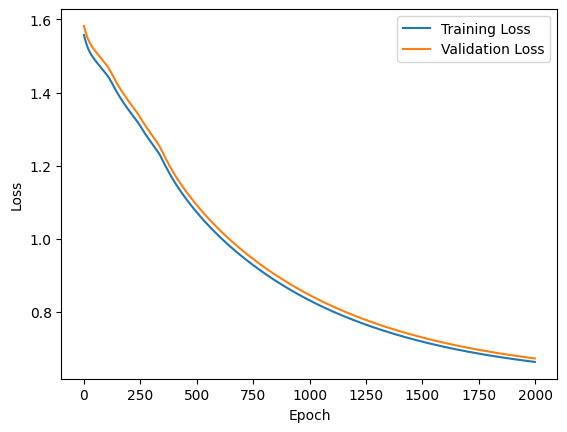

In [36]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [55]:
from torch.distributions.normal import Normal
from math import sqrt

def black_scholes_call_price(St, K, t, T, r, sigma):
    """
    Calculate the Black-Scholes call option price using PyTorch tensors.

    St: spot price tensor
    K: strike price tensor
    t: current time tensor
    T: time to maturity tensor
    r: risk-free interest rate tensor
    sigma: volatility of the underlying asset tensor
    """
    T_t = T - t
    sqrt_T_t = sqrt(T_t)
    d1 = (torch.log(St / K) + (r + 0.5 * sigma**2) * T_t) / (sigma * sqrt_T_t)
    d2 = d1 - sigma * sqrt_T_t

    normal_dist = Normal(torch.tensor([0.0]), torch.tensor([1.0]))
    call_price = St * normal_dist.cdf(d1) - K * np.exp(-r * T_t) * normal_dist.cdf(d2)
    return call_price

def CVA(gamma, r, t, T, K, sigma, St):
    t_grid = torch.linspace(t, T, 5000)
    dt = t_grid[1] - t_grid[0]

    # Calculate the call prices for each time step
    call_prices = black_scholes_call_price(St, K, t, T, r, sigma)
    print(call_prices.shape)

    # Compute the integrand at each time step
    integrand = torch.exp(-r * (t_grid - t)) * call_prices * (1 - torch.exp(-gamma * (t_grid - t)))

    # Integrate using the composite trapezoidal rule
    integral = torch.trapz(integrand, t_grid)
    
    return gamma * integral

CVA_vals = CVA(gamma, r, t, T, K, sigma, St_val.cpu())
CVA_vals


torch.Size([100000, 1])


tensor([4.8108e-02, 2.7542e-03, 3.0557e+01,  ..., 5.2745e+01, 4.6127e+00,
        6.4605e-05])

In [56]:
with torch.no_grad():
    pred = model((St_val - St_train_mean)/St_train_std)

print(pred)

tensor([[  1.4434],
        [  0.9214],
        [ 95.0616],
        ...,
        [140.2617],
        [ 15.9802],
        [  0.6740]], device='cuda:0')


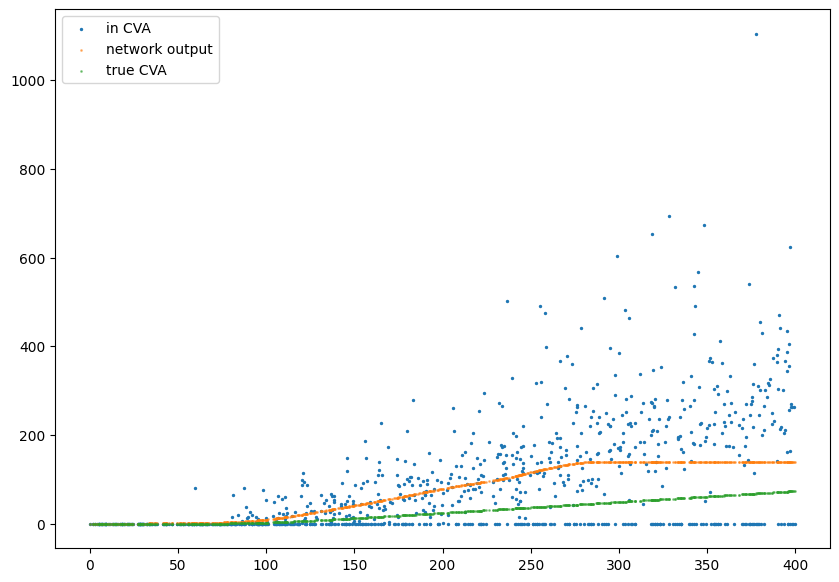

In [57]:
plt.figure(figsize=(10,7))
plt.scatter(St_val[:1000].cpu().numpy(), in_cva_val[:1000].cpu().numpy(), s=2, alpha=1, label='in CVA')
plt.scatter(St_val[:1000].cpu().numpy(), pred[:1000].cpu().numpy(), s=1, alpha=0.5, label='network output')
plt.scatter(St_val[:1000].cpu().numpy(), CVA_vals[:1000], s=1, alpha=0.5, label='true CVA')
plt.legend();